In [1]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
import pandas as pd
import nltk
import json
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/ataman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ataman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
file_paths = [
    "/Users/ataman/Downloads/soft_eng_data/20230727_195927_pr_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230727_195941_issue_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230727_195954_discussion_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230727_200003_commit_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230727_200102_file_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230727_195816_hn_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230803_093947_pr_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230803_094705_issue_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230803_094811_discussion_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230803_095317_commit_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230803_103605_file_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230803_105332_hn_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230810_123110_pr_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230810_123938_issue_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230810_124048_discussion_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230810_124807_commit_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230810_133121_file_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230810_134011_hn_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230817_125147_pr_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230817_130502_issue_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230817_130721_discussion_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230817_131244_commit_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230817_151344_file_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230817_170022_hn_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230824_100450_pr_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230824_101836_issue_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230824_102000_discussion_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230824_102435_commit_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230824_111114_file_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230824_112153_hn_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230831_060603_pr_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230831_061759_issue_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230831_061926_discussion_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230831_063412_commit_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230831_072722_file_sharings.json",
    "/Users/ataman/Downloads/soft_eng_data/20230831_073827_hn_sharings.json"
]





In [3]:



def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)
    return text


In [4]:
import os

for file_path in file_paths:
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
    else:
        print(f"File exists: {file_path}")


File exists: /Users/ataman/Downloads/soft_eng_data/20230727_195927_pr_sharings.json
File exists: /Users/ataman/Downloads/soft_eng_data/20230727_195941_issue_sharings.json
File exists: /Users/ataman/Downloads/soft_eng_data/20230727_195954_discussion_sharings.json
File exists: /Users/ataman/Downloads/soft_eng_data/20230727_200003_commit_sharings.json
File exists: /Users/ataman/Downloads/soft_eng_data/20230727_200102_file_sharings.json
File exists: /Users/ataman/Downloads/soft_eng_data/20230727_195816_hn_sharings.json
File exists: /Users/ataman/Downloads/soft_eng_data/20230803_093947_pr_sharings.json
File exists: /Users/ataman/Downloads/soft_eng_data/20230803_094705_issue_sharings.json
File exists: /Users/ataman/Downloads/soft_eng_data/20230803_094811_discussion_sharings.json
File exists: /Users/ataman/Downloads/soft_eng_data/20230803_095317_commit_sharings.json
File exists: /Users/ataman/Downloads/soft_eng_data/20230803_103605_file_sharings.json
File exists: /Users/ataman/Downloads/soft_

In [5]:

all_conversations = []
total_related_follow_ups = 0
total_new_queries = 0


for file_path in file_paths:
    with open(file_path, 'r') as file:
        data = json.load(file)['Sources']
        for source in data:
            for chatgpt_sharing in source.get('ChatgptSharing', []):
                conversation = []
                for interaction in chatgpt_sharing.get('Conversations', []):
                    prompt = interaction.get('Prompt', '')
                    answer = interaction.get('Answer', '')
                    if prompt and answer:
                        conversation.append({'prompt': prompt, 'answer': answer})
                if conversation:
                    all_conversations.append(conversation)


In [15]:

import random


if len(all_conversations) > 100:
    random_samples = random.sample(all_conversations, 50)

    
    for sample in random_samples:
        for conversation in sample:
            print("Prompt:", conversation["prompt"])
            print("Answer:", conversation["answer"])
            print("\n---\n")



Prompt: Given a List of an object with 2 fields, jarName and BeanName in java. How using streams, I can return the number of beanName per jar?
Answer: You can use Java streams and grouping operations to achieve this. Here's an example code snippet:[CODE_BLOCK_0]In this example, we have a List<JarBean> representing a collection of jar and bean pairs. We use the jarBeans list to create a stream, then apply the groupingBy collector to group the objects by jarName and count the number of occurrences using counting() collector.The resulting beanCountPerJar map will have the jarName as the key and the count of beanName occurrences as the value. You can then use this map as needed for further processing or displaying the results.

---

Prompt: generate some content for these section: About Us, Privacy Policy, Terms, Copyright with my information being a website that sells books online, named Seasonal. 

Answer: About Us:
Welcome to Seasonal, your premier destination for all things literary an

In [7]:

vectorizer = TfidfVectorizer(preprocessor=preprocess)
initial_prompts = [conversation[0]['prompt'] for conversation in all_conversations]
initial_vectors = vectorizer.fit_transform(initial_prompts)


In [8]:

for i, conversation in enumerate(all_conversations):
    initial_vector = initial_vectors[i:i+1]  
    follow_up_texts = [interaction['prompt'] for interaction in conversation[1:]]
    related_follow_ups = 0
    new_queries = 0
    
    if follow_up_texts:
        follow_up_vectors = vectorizer.transform(follow_up_texts)
        similarities = cosine_similarity(follow_up_vectors, initial_vector).flatten()

        
        threshold = 0.2
        related_follow_ups = (similarities >= threshold).sum()
        new_queries = (similarities < threshold).sum()

        total_related_follow_ups += related_follow_ups
        total_new_queries += new_queries

   
    conversation[0]['related_follow_ups'] = related_follow_ups
    conversation[0]['new_queries'] = new_queries


In [9]:

for conversation in all_conversations:
    initial_prompt = conversation[0]['prompt']
    analysis = TextBlob(initial_prompt)
    sentiment = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity
    conversation[0]['sentiment'] = sentiment
    conversation[0]['subjectivity'] = subjectivity


In [10]:

data = {
    'initial_query': [],
    'sentiment': [],
    'subjectivity': [],
    'related_follow_ups': [],
    'new_queries': []
}

for conversation in all_conversations:
    data['initial_query'].append(conversation[0]['prompt'])
    data['sentiment'].append(conversation[0]['sentiment'])
    data['subjectivity'].append(conversation[0]['subjectivity'])
    data['related_follow_ups'].append(conversation[0]['related_follow_ups'])
    data['new_queries'].append(conversation[0]['new_queries'])

df = pd.DataFrame(data)


In [11]:

average_sentiment = df['sentiment'].mean()
average_subjectivity = df['subjectivity'].mean()
average_related_follow_ups = df['related_follow_ups'].mean()
average_new_queries = df['new_queries'].mean()

print(f"Average Sentiment: {average_sentiment}")
print(f"Average Subjectivity: {average_subjectivity}")
print(f"Average Number of Related Follow-Ups: {average_related_follow_ups}")
print(f"Average Number of New Queries: {average_new_queries}")


Average Sentiment: 0.04124012616751602
Average Subjectivity: 0.3129917763736981
Average Number of Related Follow-Ups: 1.0201444622792937
Average Number of New Queries: 4.841492776886035


In [12]:
print(f"Total Number of Related Follow-Ups: {total_related_follow_ups}")
print(f"Total Number of New Queries: {total_new_queries}")

Total Number of Related Follow-Ups: 12711
Total Number of New Queries: 60325


In [13]:

total_interactions = average_related_follow_ups + average_new_queries


percentage_related_follow_ups = (average_related_follow_ups / total_interactions) * 100
percentage_new_queries = (average_new_queries / total_interactions) * 100


final_data = {
    'Metric': [
        'Average Sentiment', 
        'Average Subjectivity', 
        'Percentage of Related Follow-Ups', 
        'Percentage of New Queries'
    ],
    'Value': [
        average_sentiment, 
        average_subjectivity, 
        percentage_related_follow_ups, 
        percentage_new_queries
    ]
}

final_df = pd.DataFrame(final_data)


print(final_df)


                             Metric      Value
0                 Average Sentiment   0.041240
1              Average Subjectivity   0.312992
2  Percentage of Related Follow-Ups  17.403746
3         Percentage of New Queries  82.596254


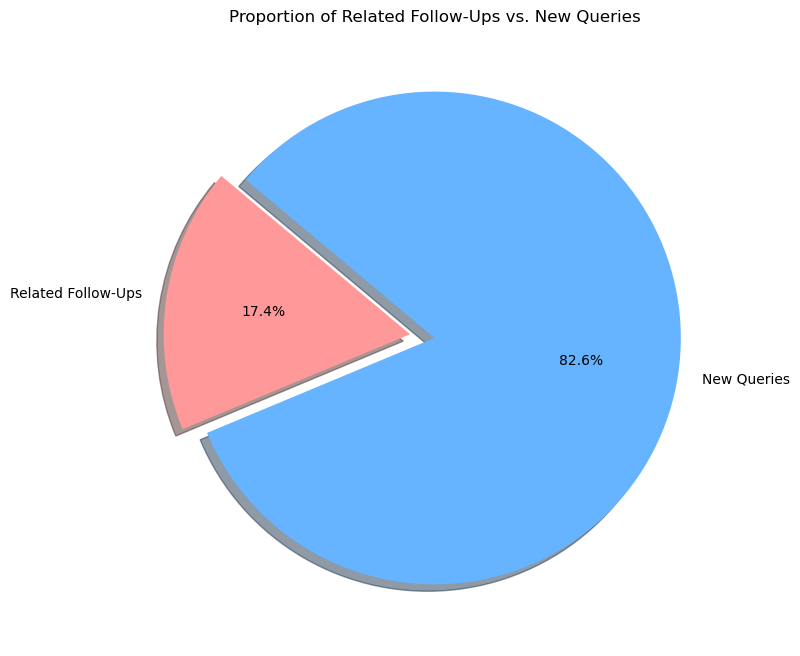

In [14]:
import matplotlib.pyplot as plt
total_related_follow_ups = df['related_follow_ups'].sum()
total_new_queries = df['new_queries'].sum()
total_interactions = total_related_follow_ups + total_new_queries
percentage_related_follow_ups = (total_related_follow_ups / total_interactions) * 100
percentage_new_queries = (total_new_queries / total_interactions) * 100

labels = ['Related Follow-Ups', 'New Queries']
sizes = [percentage_related_follow_ups, percentage_new_queries]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0) 

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Proportion of Related Follow-Ups vs. New Queries')
plt.show()
